In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Read all data from csv file.

In [2]:
word_association_men = pd.read_csv('EDA_with_Pandas.csv')
word_association_women = pd.read_csv('women_EDA.csv')

In [3]:
cols = ['Загальна кількість реакцій', 'Кількість найчастіших реакцій']
word_association_men.loc[:,cols] = word_association_men.loc[:,cols].ffill()
word_association_men.head()

,Стимул,Реакція,Кількість реакцій,Загальна кількість реакцій,Кількість найчастіших реакцій,Тип асоціації
0,зауваження,вчитель,4,101.0,16.0,слово контексту
1,зауваження,вчителя,4,101.0,16.0,слово контексту
2,зауваження,порада,4,101.0,16.0,синонім
3,зауваження,школа,4,101.0,16.0,слово контексту
4,зауважити,помилку,11,100.0,30.0,слово контексту


In [4]:
type_association = word_association_men['Тип асоціації'].value_counts()
type_association

Тип асоціації
слово контексту    780
синонім            219
антонім             33
Name: count, dtype: int64

In [5]:
num_of_association = word_association_men[word_association_men['Загальна кількість реакцій'].notna()][[
    'Стимул', 'Загальна кількість реакцій', 'Кількість найчастіших реакцій']]
num_of_association

,Стимул,Загальна кількість реакцій,Кількість найчастіших реакцій
0,зауваження,101.0,16.0
1,зауваження,101.0,16.0
2,зауваження,101.0,16.0
3,зауваження,101.0,16.0
4,зауважити,100.0,30.0
...,...,...,...
1027,поміркувати,100.0,18.0
1028,поміч,99.0,31.0
1029,поміч,99.0,31.0
1030,поміч,99.0,31.0


In [6]:
mean_freq = int(num_of_association['Загальна кількість реакцій'].mean())
mean_freq

103

In [7]:
mean_most_freq = int(
    num_of_association['Кількість найчастіших реакцій'].mean())
mean_most_freq

29

In [8]:
stimul_above_mean = num_of_association[num_of_association['Кількість найчастіших реакцій'] > mean_most_freq][[
    'Стимул', 'Кількість найчастіших реакцій']]
stimul_above_mean

,Стимул,Кількість найчастіших реакцій
4,зауважити,30.0
5,зауважити,30.0
6,зауважити,30.0
7,зауважити,30.0
8,зауважити,30.0
...,...,...
1020,помаранчевий,41.0
1028,поміч,31.0
1029,поміч,31.0
1030,поміч,31.0


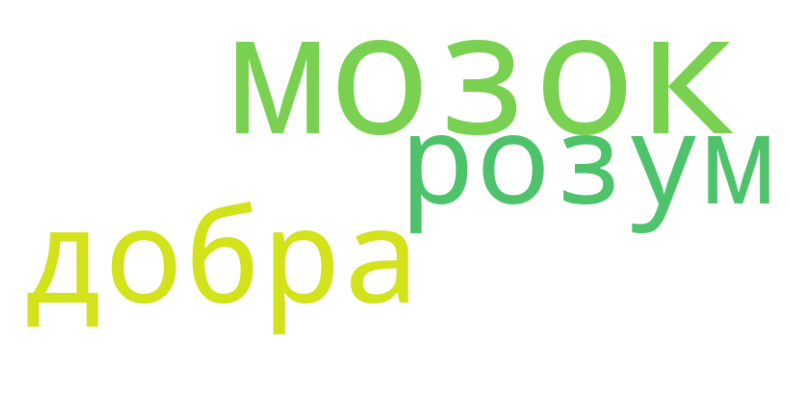

In [9]:
specific_word = "памʼять"
filtered_data = word_association_men[word_association_men['Стимул'].str.contains(
    specific_word, na=False)]

weighted_text = ' '.join((row['Реакція'] + ' ') * row['Кількість реакцій']
                         for _, row in filtered_data.iterrows())

wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(weighted_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
mean_most_freq = int(
    num_of_association['Кількість найчастіших реакцій'].mean())
mean_most_freq

29

In [11]:
the_most_frequent_reactions_of_women = word_association_women.groupby(['Реакція', 'Стимул'], as_index=False)['Кількість реакцій']\
                                    .sum().sort_values(by='Кількість реакцій', ascending=False).set_index('Стимул')
the_most_frequent_reactions_of_women.head()

,Реакція,Кількість реакцій
Стимул,,
завтрашній,день,85
сьогоднішній,день,74
заробити,гроші,70
заробляти,гроші,69
вірний,друг,62


## Сумарна кількість реакцій певного типу асоціацій для кожного стимулу 

In [ ]:
HEAD = 10

# Initialize an empty dictionary to store columns
columns = {}

# Unique reaction types
REACTION_TYPES_CHOICES = word_association_men["Тип асоціації"].unique()

# Group by "Стимул" and "Тип асоціації" and sum "Кількість реакцій"
reactions_types = word_association_men.groupby(["Стимул", "Тип асоціації"])["Кількість реакцій"].sum()

for ch in REACTION_TYPES_CHOICES:
    # Filter for the current "Тип асоціації"
    reactions_for_ch = reactions_types.xs(ch, level="Тип асоціації")

    # Sort by total sums in descending order
    sorted_reactions = reactions_for_ch.sort_values(ascending=False)

    # Take the top `HEAD` entries and store in the dictionary
    # print(sorted_reactions.head(HEAD).reset_index())
    # print(sorted_reactions.head(HEAD).reset_index().apply(lambda x: (x["Стимул"], x["Кількість реакцій"]), axis="columns"))

    columns[ch] = sorted_reactions.reset_index().apply(
        lambda x: (x["Стимул"], x["Кількість реакцій"]),
        axis="columns"
    )

# print(columns)
# Create the final DataFrame
output = pd.DataFrame(columns)

# Display the result
print(output.head(HEAD))
# print(output.describe())



    слово контексту            синонім        антонім
0     (пізнати, 85)        (оселя, 55)    (зліва, 48)
1      (калина, 59)     (побратим, 54)    (лівий, 33)
2        (мова, 55)      (переляк, 40)      (зло, 24)
3  (неприємний, 54)        (лихий, 37)     (нога, 16)
4     (минулий, 52)  (побоюватися, 37)      (ніч, 15)
5      (молода, 51)   (побоювання, 36)   (інколи, 13)
6    (побажати, 50)   (міркування, 33)   (погано, 12)
7    (їстівний, 49)       (знаний, 32)   (минуле, 11)
8        (зорі, 49)         (лихо, 31)  (можливо, 10)
9      (країна, 48)     (подружжя, 28)  (молодіти, 9)
